In [254]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [255]:
# load in the dataset into a pandas dataframe
sales=pd.read_csv('supermarket_sales.csv',parse_dates=['Date'])

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [256]:
# high-level overview of data shape and composition
print(sales.shape)
print(sales.dtypes)
sales.head(10)

(1000, 17)
Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [257]:
# descriptive statistics for numeric variables
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: Sales. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

In [258]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [259]:
sales['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

Question 1: What is the total branchwise sales?

In [260]:
branchwise_sales=sales.groupby('Branch').sum()['Total']
branch=sales.groupby('Branch').sum()['Total'].index

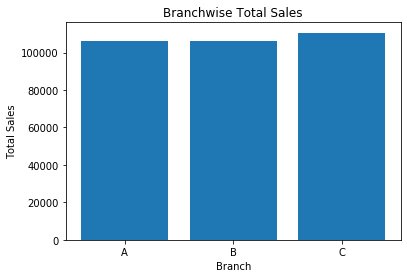

In [261]:
plt.bar(branch,branchwise_sales)
plt.xticks(branch)
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.title('Branchwise Total Sales')
plt.show();

In [262]:
branchwise_customers=sales.groupby('Branch').size()
branch=sales.groupby('Branch').size().index

In [263]:
sales.groupby('Branch').size()

Branch
A    340
B    332
C    328
dtype: int64

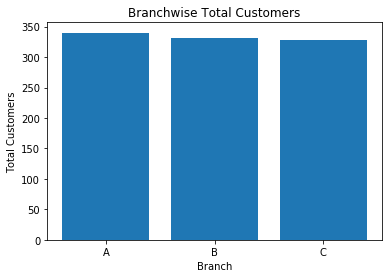

In [264]:
plt.bar(branch,branchwise_customers)
plt.xticks(branch)
plt.xlabel('Branch')
plt.ylabel('Total Customers')
plt.title('Branchwise Total Customers')
plt.show();

In [265]:
# Comment:

Question 2: Which gender buys the most?

In [266]:
genderwise_sales=sales.groupby('Gender').sum()['Total']
gender=sales.groupby('Gender').sum()['Total'].index

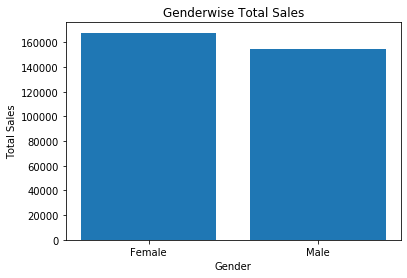

In [267]:
plt.bar(gender,genderwise_sales)
plt.xticks(gender)
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.title('Genderwise Total Sales')
plt.show();

In [268]:
# Comment: 

In [269]:
sales['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [270]:
memberwise_sales=sales.groupby('Customer type').sum()['Total']
member=sales.groupby('Customer type').sum()['Total'].index

In [271]:
member

Index(['Member', 'Normal'], dtype='object', name='Customer type')

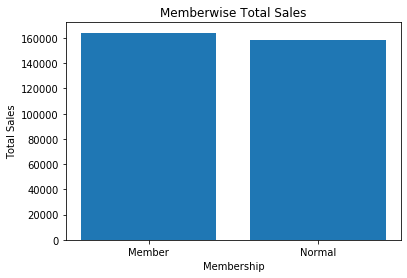

In [272]:
plt.bar(member,memberwise_sales)
plt.xlabel('Membership')
plt.ylabel('Total Sales')
plt.title('Memberwise Total Sales')
plt.show();

In [273]:
memberwise_sales

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

In [274]:
# Comment: No substantial difference membership makes in net sales

''

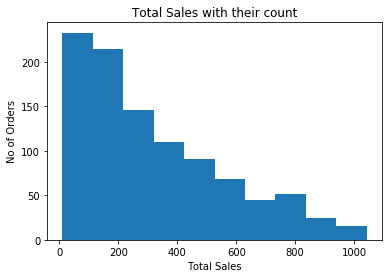

In [275]:
# univariate plot of  prices
plt.hist(sales['Total'],bins=10)
plt.xlabel('Total Sales')
plt.ylabel('No of Orders')
plt.title('Total Sales with their count')
;

In [276]:
# Comment: The Total is right skewed. 

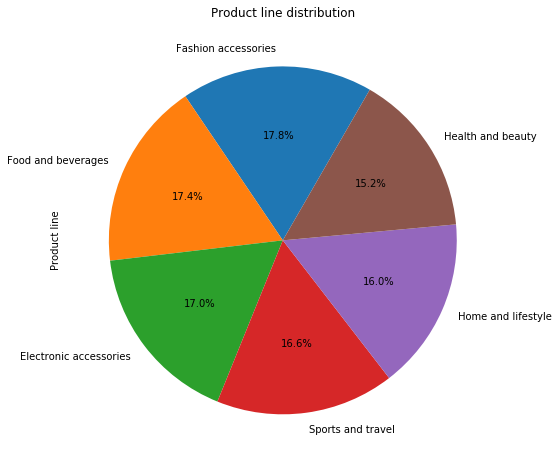

In [277]:
plt.figure(figsize=(8, 8))
explode=(0.1,0.05,0.05)
sales['Product line'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Product line distribution');


## Bivariate Exploration

In the previous notebook, you looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

Text(0, 0.5, 'Total Sales')

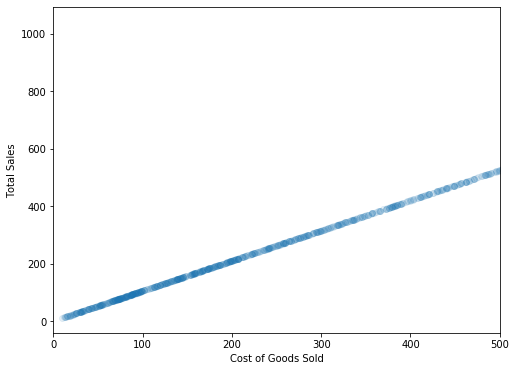

In [278]:
# Scatter plot
plt.figure(figsize=[8,6])
plt.xlim([0,500])

plt.scatter(data = sales, x = 'cogs', y = 'Total',alpha=1/10);
plt.xlabel('Cost of Goods Sold')
plt.ylabel('Total Sales')


In [279]:
sales.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

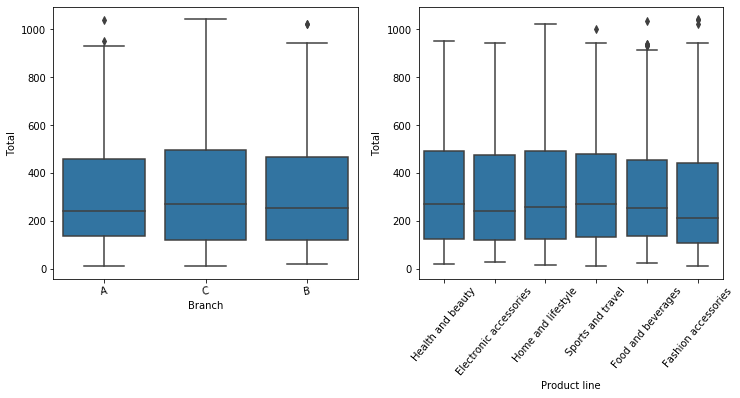

In [280]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
sb.boxplot(data = sales, x = 'Branch', y = 'Total', color = base_color)
plt.xticks(rotation = 10) # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = sales, x = 'Product line', y = 'Total', color = base_color)
plt.xticks(rotation = 50)
# right plot: adapted bar chart
#plt.subplot(1, 3, 3)
#sb.boxplot(data = diamonds, x = 'clarity', y = 'price', color = base_color)
#plt.xticks(rotation = 10)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

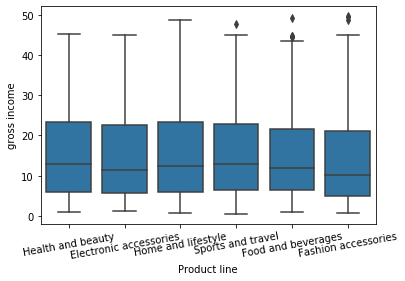

In [281]:
sb.boxplot(data = sales, x = 'Product line', y = 'gross income', color = base_color)
plt.xticks(rotation = 10) # include label rotation due to small subplot size


In [282]:
sales['gross margin percentage'].describe()

count    1.000000e+03
mean     4.761905e+00
std      6.220360e-14
min      4.761905e+00
25%      4.761905e+00
50%      4.761905e+00
75%      4.761905e+00
max      4.761905e+00
Name: gross margin percentage, dtype: float64

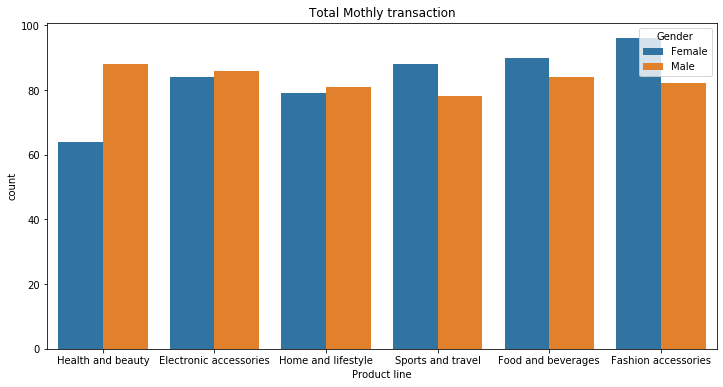

In [283]:
plt.figure(figsize=(12, 6))
plt.title('Total Mothly transaction')
sb.countplot(sales['Product line'], hue = sales['Gender'])


In [284]:
sales.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4


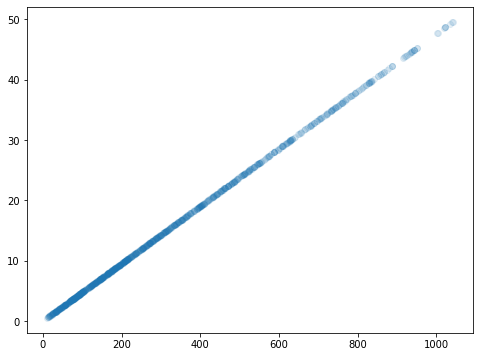

In [285]:
# Scatter plot
plt.figure(figsize=[8,6])
#plt.xlim([0,5])

plt.scatter(data = sales, x = 'Total', y = 'gross income',alpha=1/10);
#plt.xlabel('Unit Price')
#plt.ylabel('Total Sales')

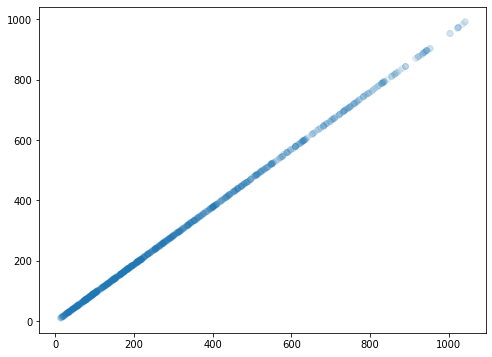

In [286]:
# Scatter plot
plt.figure(figsize=[8,6])
#plt.xlim([0,5])

plt.scatter(data = sales, x = 'Total', y = 'cogs',alpha=1/10);
#plt.xlabel('Unit Price')
#plt.ylabel('Total Sales')

In [287]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [288]:
# use of heat maps

In [289]:
pl_counts=sales.groupby(['Branch','Product line']).size()

In [290]:
pl_counts

Branch  Product line          
A       Electronic accessories    60
        Fashion accessories       51
        Food and beverages        58
        Health and beauty         47
        Home and lifestyle        65
        Sports and travel         59
B       Electronic accessories    55
        Fashion accessories       62
        Food and beverages        50
        Health and beauty         53
        Home and lifestyle        50
        Sports and travel         62
C       Electronic accessories    55
        Fashion accessories       65
        Food and beverages        66
        Health and beauty         52
        Home and lifestyle        45
        Sports and travel         45
dtype: int64

In [291]:
df_1=pd.DataFrame(pl_counts).reset_index()
df_1.columns=['Branch', 'Product line','Count']

In [292]:
df_1

,Branch,Product line,Count
0,A,Electronic accessories,60
1,A,Fashion accessories,51
2,A,Food and beverages,58
3,A,Health and beauty,47
4,A,Home and lifestyle,65
5,A,Sports and travel,59
6,B,Electronic accessories,55
7,B,Fashion accessories,62
8,B,Food and beverages,50
9,B,Health and beauty,53


In [293]:
ct_counts=df_1.pivot(index='Product line',columns='Branch',values='Count')

In [294]:
ct_counts

Branch,A,B,C
Product line,,,
Electronic accessories,60,55,55
Fashion accessories,51,62,65
Food and beverages,58,50,66
Health and beauty,47,53,52
Home and lifestyle,65,50,45
Sports and travel,59,62,45


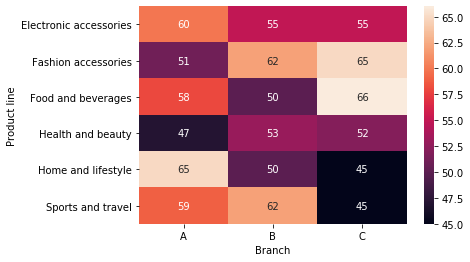

In [295]:
sb.heatmap(ct_counts,annot=True)

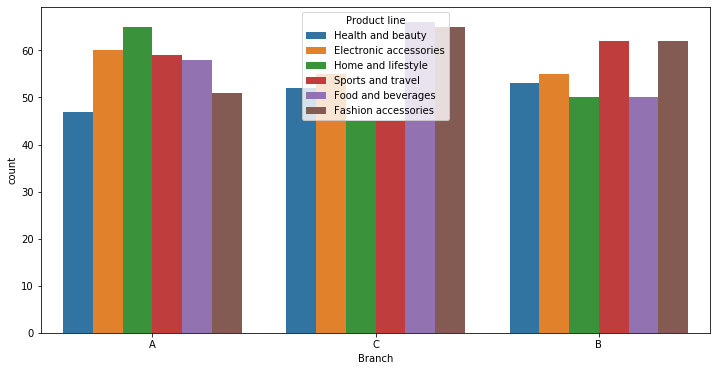

In [296]:
plt.figure(figsize=(12, 6))

sb.countplot(data=sales,x='Branch',hue='Product line')

In [297]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


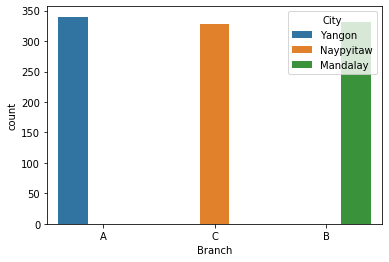

In [298]:
sb.countplot(data=sales,x='Branch',hue='City')

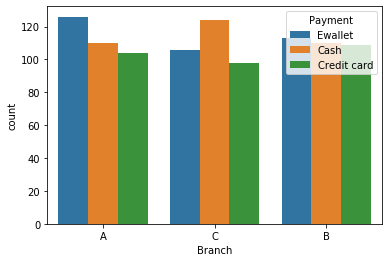

In [299]:
sb.countplot(data=sales,x='Branch',hue='Payment')

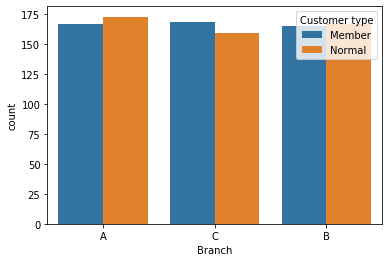

In [300]:
sb.countplot(data=sales,x='Branch',hue='Customer type')

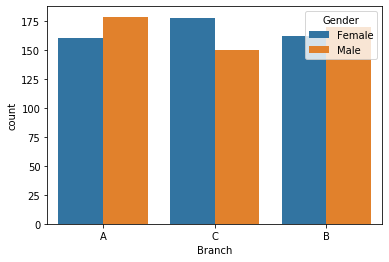

In [301]:
sb.countplot(data=sales,x='Branch',hue='Gender')

In [302]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [303]:
#sales['Rating'].value_counts(bins=8)

In [304]:
sales['Rating'].min()

4.0

In [305]:
sales['Rating'].max()

10.0

In [306]:
df_sales=sales.head(20).copy()

In [307]:
df_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [308]:
sales['Rating'].dtype

dtype('float64')

In [309]:
def rating(fl):
    if fl>=8 and fl<=10:
        return 'A'
    elif fl >=6 and fl<7.9:
        return 'B'
    else:
        return 'C'

In [310]:
df_sales['Rating Category']=df_sales['Rating'].apply(lambda x: rating(x))

In [311]:
df_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Rating Category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,A
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,A
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,B
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,A
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,C
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,C
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8,C
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0,A
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2,B
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9,C


In [312]:
df_sales['Rating Category'].value_counts()

C    9
A    6
B    5
Name: Rating Category, dtype: int64

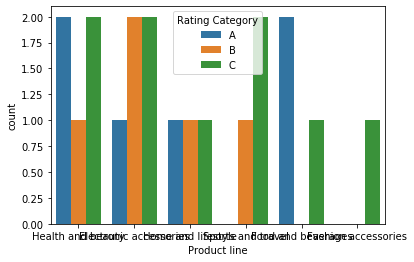

In [313]:
sb.countplot(data=df_sales,x='Product line',hue='Rating Category')

In [314]:
sr_3=df_sales.groupby(['Product line','Rating Category']).size()

In [315]:
df_3=pd.DataFrame(sr_3).reset_index()

In [316]:
df_3.columns=['Product line','Rating Category','Count']

In [317]:
df_3.dtypes

Product line       object
Rating Category    object
Count               int64
dtype: object

In [318]:
ct_1=df_3.pivot(index='Product line',columns='Rating Category',values='Count')

In [319]:
ct_1

Rating Category,A,B,C
Product line,,,
Electronic accessories,1.0,2.0,2.0
Fashion accessories,NaN,NaN,1.0
Food and beverages,2.0,NaN,1.0
Health and beauty,2.0,1.0,2.0
Home and lifestyle,1.0,1.0,1.0
Sports and travel,NaN,1.0,2.0


In [320]:
df_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Rating Category
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,A
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,A
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,B
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,A
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,C
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1,C
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8,C
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0,A
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2,B
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9,C


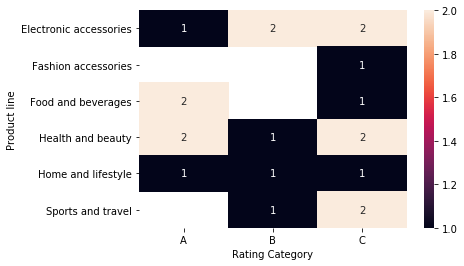

In [321]:
sb.heatmap(ct_1,annot=True)

In [322]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [323]:
# Which hour is the busiest ?

In [324]:
sales['Time'].dtype

dtype('O')

In [325]:
sales['sales_hour']=sales['Time'].str[:-3]

In [326]:
str2='13:08'
str2[:-3]

'13'

In [327]:
sales['sales_hour']

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: sales_hour, Length: 1000, dtype: object

In [328]:
for sales_hour,df in sales.groupby('sales_hour'):
    print(sales_hour)

10
11
12
13
14
15
16
17
18
19
20


In [329]:
hours =[sales_hour for sales_hour,df in sales.groupby('sales_hour')]
hours

['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']

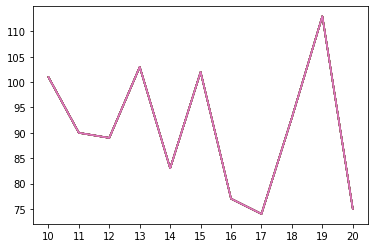

In [330]:
plt.plot(hours,sales.groupby('sales_hour').count())
plt.show();

In [331]:
sales_city=sales.groupby(['Product line','City']).sum()['Total']

In [332]:
df_sales_city=pd.DataFrame(sales_city).reset_index()
df_sales_city.columns=['Product line','City','Total Sales']

In [333]:
df_sales_city

,Product line,City,Total Sales
0,Electronic accessories,Mandalay,17051.4435
1,Electronic accessories,Naypyitaw,18968.9745
2,Electronic accessories,Yangon,18317.1135
3,Fashion accessories,Mandalay,16413.3165
4,Fashion accessories,Naypyitaw,21560.0700
5,Fashion accessories,Yangon,16332.5085
6,Food and beverages,Mandalay,15214.8885
7,Food and beverages,Naypyitaw,23766.8550
8,Food and beverages,Yangon,17163.1005
9,Health and beauty,Mandalay,19980.6600


In [334]:
df_sales_city_pivot=df_sales_city.pivot(index='Product line',columns='City',values='Total Sales')

In [335]:
df_sales_city_pivot

City,Mandalay,Naypyitaw,Yangon
Product line,,,
Electronic accessories,17051.4435,18968.9745,18317.1135
Fashion accessories,16413.3165,21560.0700,16332.5085
Food and beverages,15214.8885,23766.8550,17163.1005
Health and beauty,19980.6600,16615.3260,12597.7530
Home and lifestyle,17549.1645,13895.5530,22417.1955
Sports and travel,19988.1990,15761.9280,19372.6995


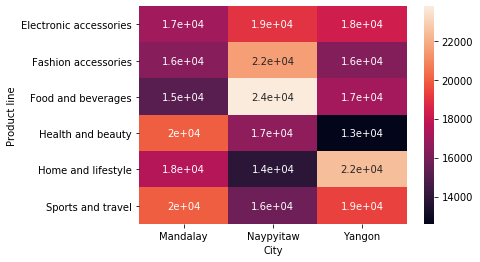

In [336]:
sb.heatmap(df_sales_city_pivot,annot=True)

In [337]:
df_sales_city

,Product line,City,Total Sales
0,Electronic accessories,Mandalay,17051.4435
1,Electronic accessories,Naypyitaw,18968.9745
2,Electronic accessories,Yangon,18317.1135
3,Fashion accessories,Mandalay,16413.3165
4,Fashion accessories,Naypyitaw,21560.0700
5,Fashion accessories,Yangon,16332.5085
6,Food and beverages,Mandalay,15214.8885
7,Food and beverages,Naypyitaw,23766.8550
8,Food and beverages,Yangon,17163.1005
9,Health and beauty,Mandalay,19980.6600


''

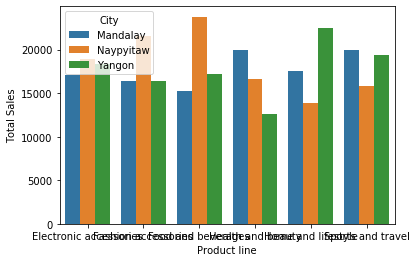

In [338]:
sb.barplot(data=df_sales_city,x='Product line',y='Total Sales',hue='City')
;

In [339]:
filt1=(sales['Product line']=='Electronic accessories') & (sales['City']=='Mandalay')

In [340]:
sales[filt1]['Total'].sum()

17051.443499999998

In [341]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,sales_hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

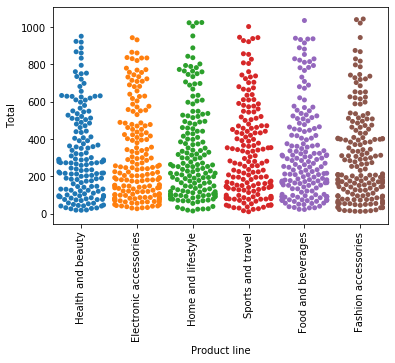

In [342]:
sb.swarmplot(data=sales,x='Product line',y='Total')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

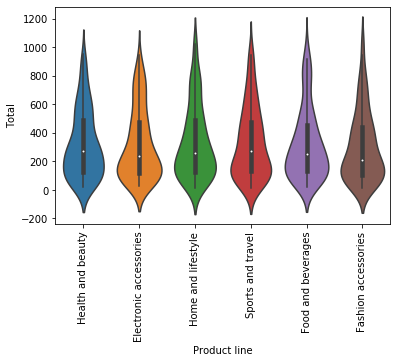

In [343]:
sb.violinplot(data=sales,x='Product line',y='Total')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

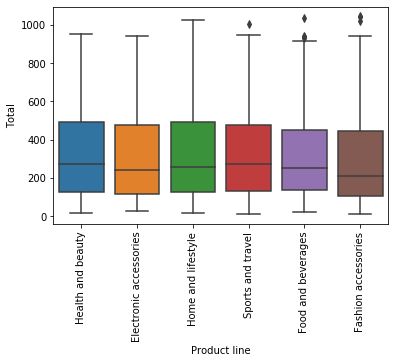

In [344]:
sb.boxplot(data=sales,x='Product line',y='Total')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

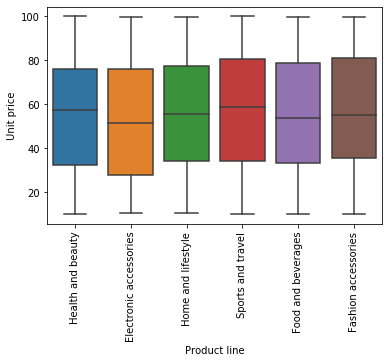

In [345]:
sb.boxplot(data=sales,x='Product line',y='Unit price')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

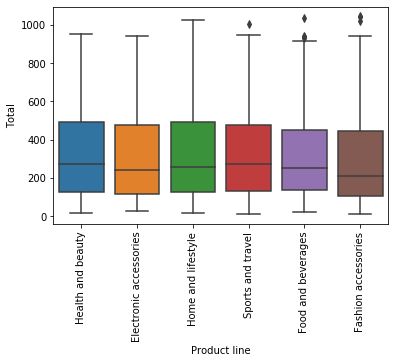

In [346]:
sb.boxplot(data=sales,x='Product line',y='Total')
plt.xticks(rotation=90)

In [347]:
# timeseries by resampling

In [348]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,sales_hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


In [349]:
df_time=sales[['Date','Total']]

In [350]:
df_time.set_index('Date',inplace=True)

In [351]:
df_time.head()

,Total
Date,
2019-01-05,548.9715
2019-03-08,80.2200
2019-03-03,340.5255
2019-01-27,489.0480
2019-02-08,634.3785


In [352]:
df_time.dtypes

Total    float64
dtype: object

In [353]:
resampled=df_time.resample('W').sum()

In [354]:
resampled

,Total
Date,
2019-01-06,17543.3895
2019-01-13,24461.1990
2019-01-20,28693.3605
2019-01-27,29286.8835
2019-02-03,28360.4475
2019-02-10,27101.8335
2019-02-17,25563.5940
2019-02-24,17328.6645
2019-03-03,29219.7150


<Figure size 720x576 with 0 Axes>

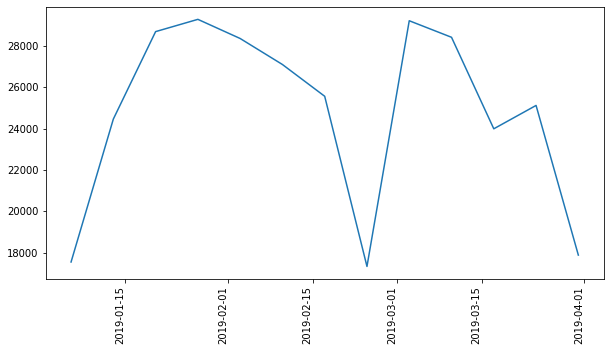

In [355]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8))
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(resampled)
for label in ax.get_xticklabels():
    label.set_rotation(90)
    label.set_ha('right')

<Figure size 720x576 with 0 Axes>

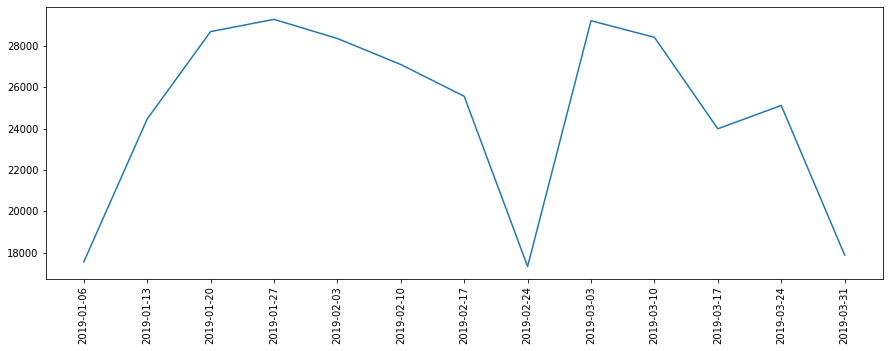

In [377]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8))
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(resampled)
plt.xticks(resampled_dates,rotation=90);

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8))
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(resampled)
for label in ax.get_xticklabels():
    label.set_rotation(90)
    label.set_ha('right')

In [375]:
resampled_dates=resampled.index
resampled_dates

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')

In [380]:
sales.sort_values('Date')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,sales_hour
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3,19
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7,13
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7,14
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9,20
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,2019-03-30,14:43,Ewallet,874.98,4.761905,43.749,6.0,14
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12:51,Credit card,81.44,4.761905,4.072,9.5,12
963,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,2019-03-30,20:37,Cash,290.46,4.761905,14.523,6.7,20
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10:18,Cash,447.40,4.761905,22.370,7.4,10


In [440]:
def largest_total(lists):
    lst_tot=[]
    for val in lst:
        tot=0
        for i in range(len(val)):
            tot=tot+val[i]
        lst_tot.append(tot)
    mx=max(lst_tot)
    
    
    for val1 in lists:
        if sum(val1)==mx:
            print(val1)

In [444]:
lst=[[4, 10], [20, 30, 40], [9, 8, 20]]
largest_total(lst)

[20, 30, 40]


In [446]:
str1='hezlo'
max(str1)

'z'

In [450]:
def largest_letters(strings):
    wrd=''
    for val in strings:
        wrd=wrd+max(val)
    return wrd


In [451]:
strings=['tree', 'computer', 'python']
largest_letters(strings)

'tuy'

In [470]:
# assert even_odd_sort([5, 2, 8, 10, 3, 12]) == [2, 8, 10, 12, 3, 5]
lst=[5, 2, 8, 10, 3, 12]
lst_sort1=[]
for val in lst:
    if val%2==0:
        lst_sort1.append(val)
    lst_sort1.sort()
lst_sort2=[]
for val in lst:
    if val not in lst_sort1:
        lst_sort2.append(val)
lst_sort1.extend(sorted(lst_sort2))
        

In [471]:
lst_sort1

[2, 8, 10, 12, 3, 5]

In [474]:
#assert quotient_remainder(10, 2) == (5, 0)
def quotient_remainder(num1,num2):
    return int(num1/num2),num1%num2

In [476]:
quotient_remainder(28,9)

(3, 1)

In [477]:
def even_odd_sort(nums):
    """
    Sorts of list of numbers by even numbers followed 
    by odd numbers
    
    i.e. [5, 8, 14, 3, 1, 0] becomes [0, 8, 14, 1, 3, 5]
    
    Parameters
    ----------
    nums : list of integers
    
    Returns
    -------
    list
    """
    # YOUR CODE HERE
    lst_sort1=[]
    for val in nums:
        if val%2==0:
            lst_sort1.append(val)
        lst_sort1.sort()
    lst_sort2=[]
    for val in nums:
        if val not in lst_sort1:
            lst_sort2.append(val)
    lst_sort1.extend(sorted(lst_sort2))
    return lst_sort1

In [478]:
even_odd_sort([5, 2, 8, 10, 3, 12])

[2, 8, 10, 12, 3, 5]

In [479]:
even_odd_sort([9, 5, 3, 6, 4, 2, 0])

[0, 2, 4, 6, 3, 5, 9]

In [482]:
str1=5 + 10 > 3 and -6 < -10


In [483]:
for val in str1:
    if val.isnumeric():
        print(val)

TypeError: 'bool' object is not iterable